# Project 7: Machine Learning
Trent Rueckert - October 8th, 2024

https://github.com/trentrueckert/datafun-07-ml

## Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

Create a lambda to calculate Celsius equivalents of Fahrenheit temperatures 0-100 in 10-degree increments

In [6]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

Put the data in a dataframe using pandas then display the temperatures

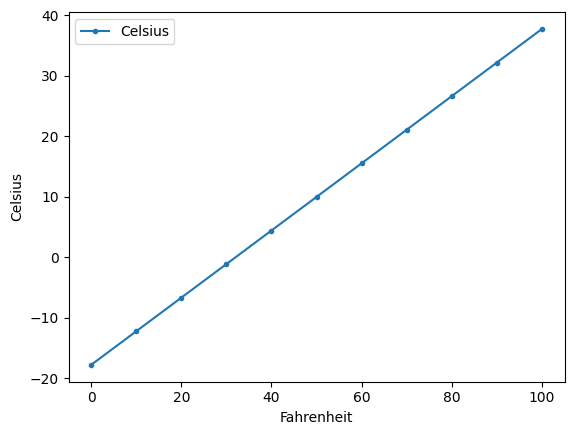

In [7]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition
Load the data into a dataframe

In [8]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection
Inspect the data with head and tail

In [9]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [10]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning
Rename the 'Value' column as 'Temperature'

In [13]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


Check the column type

In [14]:
nyc_df.Date.dtype

dtype('int64')

Divide by 100 to truncate the last two digits

In [15]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics
For basic descriptive statistics call describe on the Temperature column

In [17]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model
Use stats from scipy and linregress to calculate slope and intercept

In [18]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

Slope

In [19]:
linear_regression.slope

np.float64(0.014771361132966163)

Intercept

In [20]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict
Predict the average high temperature for January of 2024

In [21]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

Predict the average high temperature for January of 1890 (before the file tracks)

In [22]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations
Plot the average high temperatures with a regression line

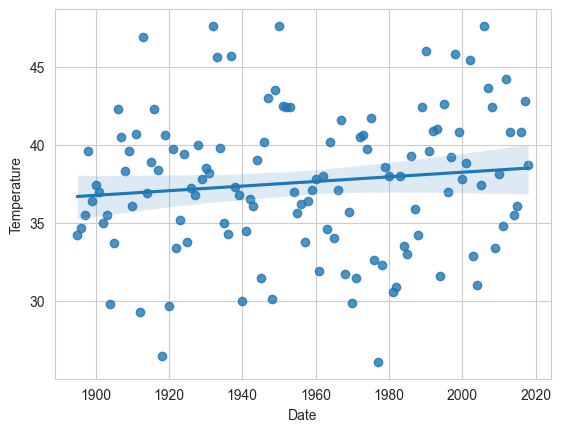

In [23]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

Scale the y axis for a better visual

(10.0, 70.0)

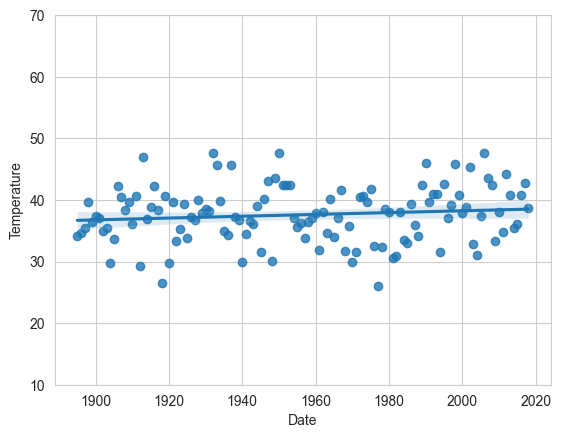

In [36]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)
axes.set_ylim(10,70)

## Part 3 - Prediction

### Section 1 - Build the Model
Split the data into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values,
    random_state=11)

Confirm the model's shape by checking the shape of X_train and X_test

In [26]:
X_train.shape

(93, 1)

In [27]:
X_test.shape

(31, 1)

Train the model

In [29]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print('Coefficients:', linear_regression.coef_)
print('Intercept', linear_regression.intercept_)

Coefficients: [0.01939167]
Intercept -0.30779820252656975


### Section 2 - Test the Model
Testing the model using X_test

In [30]:
# Predicted and expected values for every 5th element
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict
Predict the average high temperature for January 2024

In [31]:
predict = (lambda x: linear_regression.coef_ * x +
           linear_regression.intercept_)
predict(2024)

array([38.94094855])

Predict the average high temperature for January 1890

In [32]:
predict(1890)

array([36.34246432])

### Section 4 - Visualizations
Display the data points

(10.0, 70.0)

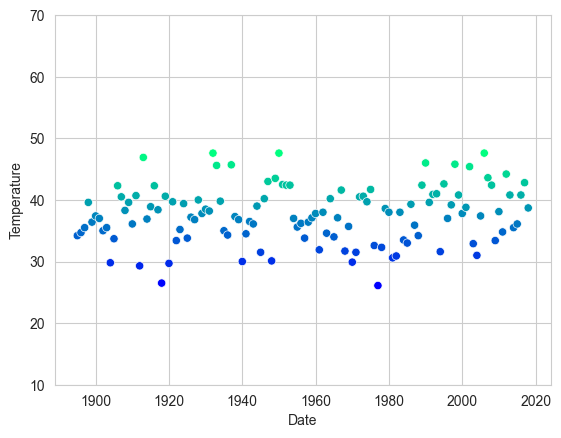

In [35]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10,70)

Create an array containing the min and max date values

Pass the array x to the predict lambda to produce an array containing the corresponding predicted values

Plot the regression line

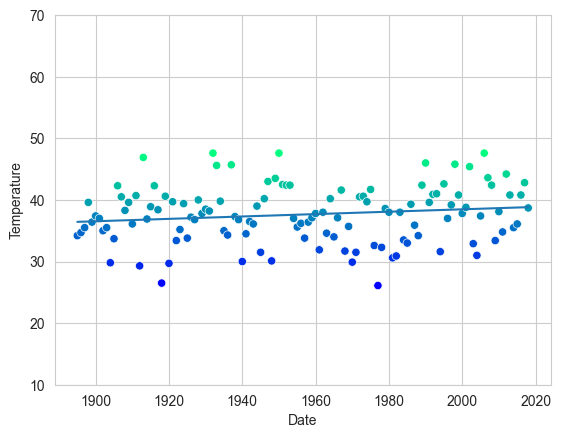

In [42]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
     hue='Temperature', palette='winter', legend=False)

axes.set_ylim(10, 70)

# X coordinates
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

# Y coordinates
y = predict(x)

line = plt.plot(x, y)